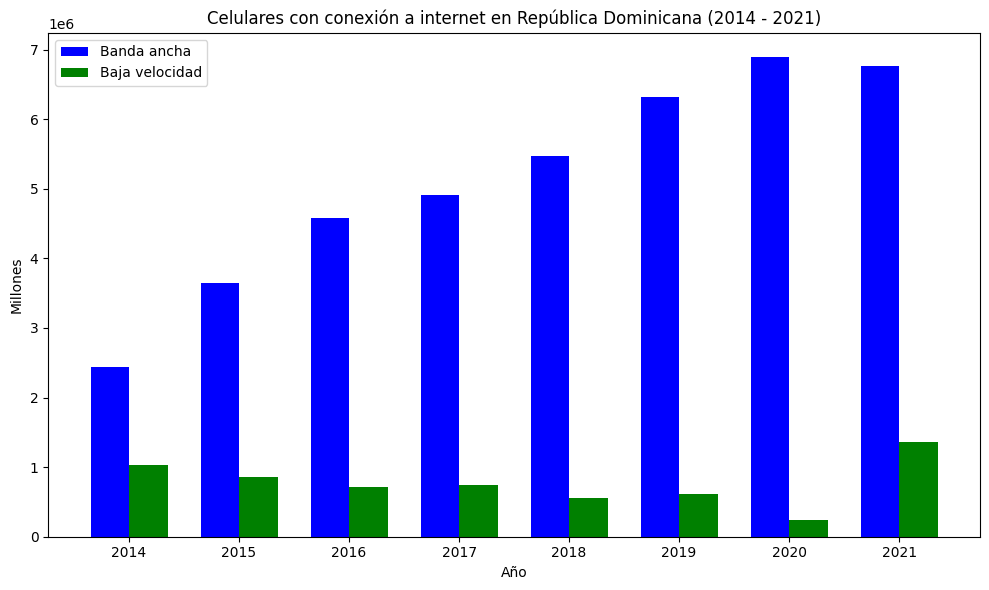

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file = pd.read_excel('assets/docs/dataset.xlsx', sheet_name='internet-movil')
df = pd.DataFrame(file)

categories = df.columns.values[1:]
fast = df.values[0][1:]
slow = df.values[1][1:]

x = np.arange(len(categories))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, fast, bar_width, label='Banda ancha', color='blue')
plt.bar(x + bar_width/2, slow, bar_width, label='Baja velocidad', color='green')
plt.title('Celulares con conexión a internet en República Dominicana (2014 - 2021)')
plt.xlabel('Año')
plt.ylabel('Millones')
plt.xticks(x, categories)
plt.legend()

plt.tight_layout()
plt.show()

                 Provincia    Total
0        Distrito Nacional  1029110
1                     Azua   240209
2                  Baoruco   108717
3                 Barahona   200886
4                  Dajabón    74810
5                   Duarte   308353
6               Elías Piña    64614
7                 El Seibo    99169
8                Espaillat   241058
9            Independencia    60689
10           La Altagracia   446060
11               La Romana   287914
12                 La Vega   442719
13  María Trinidad Sánchez   156633
14            Monte Cristi   123519
15              Pedernales    34375
16                 Peravia   209372
17            Puerto Plata   338355
18        Hermanas Mirabal    96441
19                  Samaná   111987
20           San Cristóbal   688828
21                San Juan   244667
22    San Pedro de Macorís   337146
23         Sanchez Ramírez   162642
24                Santiago  1074679
25      Santiago Rodríguez    64635
26                Valverde  

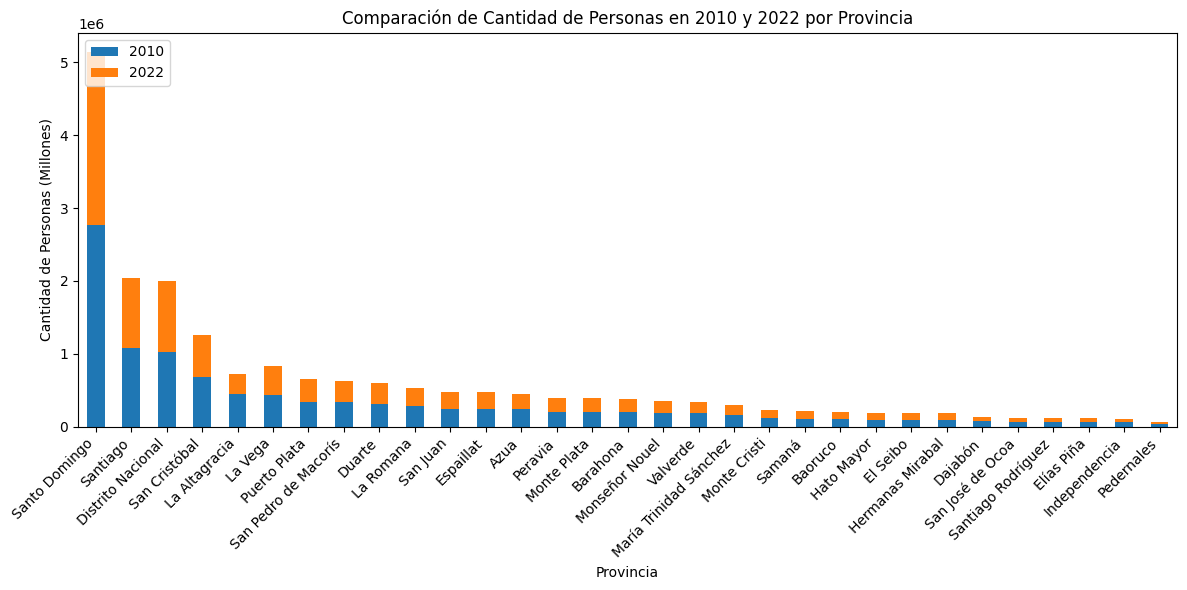

In [5]:
#Data original

df_censo2010 = pd.read_excel('assets/docs/dataset.xlsx', sheet_name='censo-2010')
df_censo2022 = pd.read_excel('assets/docs/dataset.xlsx', sheet_name='censo-2022')
df_cuentas = pd.read_excel('assets/docs/dataset.xlsx', sheet_name='internet-fijo')


#Data filtrada

df_ce2010 = df_censo2010[['Provincia', 'Total']]
df_ce2022 = df_censo2022[['Provincia', 'Total']]
df_cuTotal = df_cuentas[['Provincia' , 2022]]

print(df_ce2022)
# print(df_ce2010)
print(df_cuTotal)

# Grafica

merged_df = pd.merge(df_ce2022[['Provincia', 'Total']], df_ce2010[['Provincia', 'Total']], on='Provincia')

merged_df.rename(columns={'Total_x': 'Total_2022', 'Total_y': 'Total_2010'}, inplace=True)

merged_df.sort_values(by='Total_2022', ascending=False, inplace=True)

merged_df.plot(kind='bar', x='Provincia', stacked=True, figsize=(12, 6))
plt.title('Comparación de Cantidad de Personas en 2010 y 2022 por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Personas (Millones)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', labels=['2010', '2022'])
plt.tight_layout()
plt.show()

In [6]:
import folium

route = "assets/docs/dataset.xlsx"
hospitals = pd.read_excel(route, sheet_name='centros-de-salud')

#Limpiado
hospitals["AÑO DE APERTURA"] = hospitals["AÑO DE APERTURA"].replace("N/D", 0)
hospitals["AÑO DE APERTURA"] = hospitals["AÑO DE APERTURA"].replace("+", 0)
hospitals = hospitals[hospitals['AÑO DE APERTURA'] != 0]
hospitals = hospitals[hospitals['COORDENADAS'] != "0.0000000,0.0000000"]

hospitals["AÑO DE APERTURA"] = pd.to_datetime(hospitals["AÑO DE APERTURA"], format="%Y")
hospitals['AÑO DE APERTURA'] = hospitals['AÑO DE APERTURA'].dt.strftime('%Y-%m-01')
hospitals["DECADA"] = (pd.to_datetime(hospitals["AÑO DE APERTURA"]).dt.year // 10) * 10
hospitals = hospitals.sort_values(by="DECADA")
print(hospitals.head())

#Desarrollo del mapa
hospitals = hospitals[hospitals['TIPO DE CENTRO'] == "CENTRO DE PRIMER NIVEL"]
hospitals = hospitals[hospitals['PROVINCIA'] == ("SANTIAGO")]
mapa = folium.Map(location=[18.7357, -70.1627], zoom_start=8)

for decada in hospitals["DECADA"].unique():
  hospitales_decada = hospitals[hospitals['DECADA'] == decada]
  print(len(hospitales_decada))
  coordenadas = []

  for coordenada in hospitales_decada["COORDENADAS"]:
    latitud, longitud = coordenada.split(",")
    latitud = float(latitud)
    longitud = float(longitud)
    coordenadas.append((longitud, latitud))

  for coordenada in coordenadas:
    folium.Marker(location=(coordenada[1], coordenada[0]), icon=folium.Icon(icon="cloud")).add_to(mapa)
  mapa.save(fr"assets/maps/mapa_puntos{decada}.html")

C:\Users\M4NU\AppData\Local\Temp\ipykernel_23296\1318565444.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hospitals["AÑO DE APERTURA"] = hospitals["AÑO DE APERTURA"].replace("+", 0)


     ID_CENTRO NOMBRE DEL ESTABLECIMIENTO TIPO DE CENTRO  \
103         25              PADRE BILLINI       HOSPITAL   
104        157              SIGFREDO ALBA       HOSPITAL   
113          8              SANTO SOCORRO       HOSPITAL   
115        120          DR ALEJO MARTINEZ       HOSPITAL   
114       2010    ARISTIDES FIALLO CABRAL       HOSPITAL   

                PROVINCIA             COORDENADAS AÑO DE APERTURA  DECADA  
103     DISTRITO NACIONAL  18.4710690,-69.8890600      1878-01-01    1870  
104       SANCHEZ RAMIREZ  19.1205910,-70.2965950      1914-01-01    1910  
113     DISTRITO NACIONAL  18.4962510,-69.9241400      1948-01-01    1940  
115  SAN PEDRO DE MACORIS  18.5412600,-69.1797710      1949-01-01    1940  
114             LA ROMANA  18.5872000,-68.9784000      1949-01-01    1940  
8
15
22
23
12
2
